In [1]:
# read nc output from WAOM 10km run
import venv

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    Hsbl_tmp = np.nanmean(ds.variables["Hsbl"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    zice_tmp = ds.variables["zice"]
    
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w + ds.zice
        
    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp, axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        Hsbl = Hsbl_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        zice = zice_tmp
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        Hsbl = np.stack((Hsbl,Hsbl_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
        shflux = np.stack((shflux, shflux_tmp), axis=0)
        ssflux = np.stack((ssflux, ssflux_tmp), axis=0)
        zice = np.stack((zice, zice_tmp), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        Hsbl_tmp_4thdim = np.expand_dims(Hsbl_tmp, axis=0)
        Hsbl = np.concatenate((Hsbl,Hsbl_tmp_4thdim), axis=0)    
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0)    
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)
        zice_tmp_4thdim = np.expand_dims(zice_tmp, axis=0)
        zice = np.concatenate((zice,zice_tmp_4thdim), axis=0)
            
#ds.coords['z_rho'] = z_rho#.transpose() # put z_rho into ds dataset


dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset


sigma_t = gsw.rho(salt,temp,0) - 1000

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [3]:
print(sigma_t.shape)

diff_sigma = np.empty(sigma_t.shape)
for mm in np.arange(0,12):
    for kk in np.arange(0,30):
       # print(kk)
        diff_sigma[mm,kk,:,:] = np.squeeze(sigma_t[mm,kk,:,:]) - np.squeeze(sigma_t[mm,30,:,:])
        

(12, 31, 560, 630)


In [4]:
## read diffusion/advection of temperature - horizontal and vertical terms:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_dia_00' + mm + '.nc')
    print(dd.variables["temp_vdiff"].shape)
    temp_hdiff_tmp = np.nanmean(dd.variables["temp_hdiff"], axis=0)
    temp_vdiff_tmp = np.nanmean(dd.variables["temp_vdiff"], axis=0)
    temp_hadv_tmp = np.nanmean(dd.variables["temp_hadv"], axis=0)
    temp_vadv_tmp = np.nanmean(dd.variables["temp_vadv"], axis=0)
    
     # concatenate monthly avgs into a yearly variable
    if mm == '01':
        temp_hdiff = temp_hdiff_tmp
        temp_vdiff = temp_vdiff_tmp
        temp_hadv = temp_hadv_tmp
        temp_vadv = temp_vadv_tmp
    elif mm == '02':
        temp_hdiff = np.stack((temp_hdiff,temp_hdiff_tmp), axis=0)
        temp_vdiff = np.stack((temp_vdiff,temp_vdiff_tmp), axis=0)
        temp_hadv = np.stack((temp_hadv,temp_hadv_tmp), axis=0)
        temp_vadv = np.stack((temp_vadv,temp_vadv_tmp), axis=0)
    else:
        temp_hdiff_tmp_4thdim = np.expand_dims(temp_hdiff_tmp, axis=0)
        temp_hdiff = np.concatenate((temp_hdiff,temp_hdiff_tmp_4thdim), axis=0)
        temp_vdiff_tmp_4thdim = np.expand_dims(temp_vdiff_tmp, axis=0)
        temp_vdiff = np.concatenate((temp_vdiff,temp_vdiff_tmp_4thdim), axis=0) 
        temp_hadv_tmp_4thdim = np.expand_dims(temp_hadv_tmp, axis=0)
        temp_hadv= np.concatenate((temp_hadv,temp_hadv_tmp_4thdim), axis=0)
        temp_vadv_tmp_4thdim = np.expand_dims(temp_vadv_tmp, axis=0)
        temp_vadv = np.concatenate((temp_vadv,temp_vadv_tmp_4thdim), axis=0) 
        
    dd.close()

(7, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)


In [5]:
## read diffusion/advection of temperature - horizontal and vertical terms:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_dia_00' + mm + '.nc')
    print(dd.variables["salt_vdiff"].shape)
    salt_hdiff_tmp = np.nanmean(dd.variables["salt_hdiff"], axis=0)
    salt_vdiff_tmp = np.nanmean(dd.variables["salt_vdiff"], axis=0)
    salt_hadv_tmp = np.nanmean(dd.variables["salt_hadv"], axis=0)
    salt_vadv_tmp = np.nanmean(dd.variables["salt_vadv"], axis=0)
    
     # concatenate monthly avgs into a yearly variable
    if mm == '01':
        salt_hdiff = salt_hdiff_tmp
        salt_vdiff = salt_vdiff_tmp
        salt_hadv = salt_hadv_tmp
        salt_vadv = salt_vadv_tmp
    elif mm == '02':
        salt_hdiff = np.stack((salt_hdiff,salt_hdiff_tmp), axis=0)
        salt_vdiff = np.stack((salt_vdiff,salt_vdiff_tmp), axis=0)
        salt_hadv = np.stack((salt_hadv,salt_hadv_tmp), axis=0)
        salt_vadv = np.stack((salt_vadv,salt_vadv_tmp), axis=0)
    else:
        salt_hdiff_tmp_4thdim = np.expand_dims(salt_hdiff_tmp, axis=0)
        salt_hdiff = np.concatenate((salt_hdiff,salt_hdiff_tmp_4thdim), axis=0)
        salt_vdiff_tmp_4thdim = np.expand_dims(salt_vdiff_tmp, axis=0)
        salt_vdiff = np.concatenate((salt_vdiff,salt_vdiff_tmp_4thdim), axis=0) 
        salt_hadv_tmp_4thdim = np.expand_dims(salt_hadv_tmp, axis=0)
        salt_hadv= np.concatenate((salt_hadv,salt_hadv_tmp_4thdim), axis=0)
        salt_vadv_tmp_4thdim = np.expand_dims(salt_vadv_tmp, axis=0)
        salt_vadv = np.concatenate((salt_vadv,salt_vadv_tmp_4thdim), axis=0) 
        
    dd.close()

(7, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)


In [6]:
## read tendency terms for temperature and salinity:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_dia_00' + mm + '.nc')
    salt_rate_tmp = np.nanmean(dd.variables["salt_rate"], axis=0)
    temp_rate_tmp = np.nanmean(dd.variables["temp_rate"], axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        salt_rate = salt_rate_tmp
        temp_rate = temp_rate_tmp
    elif mm == '02':
        salt_rate = np.stack((salt_rate,salt_rate_tmp), axis=0)
        temp_rate = np.stack((temp_rate,temp_rate_tmp), axis=0)
    else:
        salt_rate_tmp_4thdim = np.expand_dims(salt_rate_tmp, axis=0)
        salt_rate = np.concatenate((salt_rate,salt_rate_tmp_4thdim), axis=0)
        temp_rate_tmp_4thdim = np.expand_dims(temp_rate_tmp, axis=0)
        temp_rate = np.concatenate((temp_rate,temp_rate_tmp_4thdim), axis=0)
        
    dd.close()

In [7]:
# calculate model thickness for vertical integrals:
# use z_w_avg (monthly)

# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]
    
print(dz.shape, temp_hdiff.shape)

# transpose dz to the same dim order as temp_xdiff
dz_trsp = dz.transpose(0,3,1,2)

print(dz_trsp.shape)

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


(12, 560, 630, 31) (12, 31, 560, 630)
(12, 31, 560, 630)


In [9]:
temp_hdiff_full_vint = np.empty(salt[:,0,:,:].shape)
temp_vdiff_full_vint = np.empty(salt[:,0,:,:].shape)
salt_hdiff_full_vint = np.empty(salt[:,0,:,:].shape)
salt_vdiff_full_vint = np.empty(salt[:,0,:,:].shape)

temp_hadv_full_vint = np.empty(salt[:,0,:,:].shape)
temp_vadv_full_vint = np.empty(salt[:,0,:,:].shape)
salt_hadv_full_vint = np.empty(salt[:,0,:,:].shape)
salt_vadv_full_vint = np.empty(salt[:,0,:,:].shape)

temp_rate_full_vint = np.empty(salt[:,0,:,:].shape)
salt_rate_full_vint = np.empty(salt[:,0,:,:].shape)

for mm in np.arange(0,12):
    depth = np.squeeze(z_rho[mm,:,:,:])
    depth_sort = depth.transpose(2,0,1) #'s_rho','eta_rho','xi_rho')
    print(mm)
    
    for ii in np.arange(0,560):
        for jj in np.arange(0,630):
            # for vertically-integrated vars: calculate var*dz_trsp
            # Diffusion
            temp_hdiff_full_dz_trsp = temp_hdiff[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            temp_vdiff_full_dz_trsp = temp_vdiff[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            salt_hdiff_full_dz_trsp = salt_hdiff[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            salt_vdiff_full_dz_trsp = salt_vdiff[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            #print(temp_hdiff_full_dz_trsp.shape)
            # sum in the vertical
            temp_hdiff_full_vint[mm,ii,jj] = np.nansum(temp_hdiff_full_dz_trsp, axis=0)
            temp_vdiff_full_vint[mm,ii,jj] = np.nansum(temp_vdiff_full_dz_trsp, axis=0)
            salt_hdiff_full_vint[mm,ii,jj] = np.nansum(salt_hdiff_full_dz_trsp, axis=0)
            salt_vdiff_full_vint[mm,ii,jj] = np.nansum(salt_vdiff_full_dz_trsp, axis=0)
            del temp_hdiff_full_dz_trsp, temp_vdiff_full_dz_trsp
            del salt_hdiff_full_dz_trsp, salt_vdiff_full_dz_trsp

            # Advection
            temp_hadv_full_dz_trsp = temp_hadv[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            temp_vadv_full_dz_trsp = temp_vadv[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            salt_hadv_full_dz_trsp = salt_hadv[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            salt_vadv_full_dz_trsp = salt_vadv[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            # sum in the vertical
            temp_hadv_full_vint[mm,ii,jj] = np.nansum(temp_hadv_full_dz_trsp, axis=0)
            temp_vadv_full_vint[mm,ii,jj] = np.nansum(temp_vadv_full_dz_trsp, axis=0)
            salt_hadv_full_vint[mm,ii,jj] = np.nansum(salt_hadv_full_dz_trsp, axis=0)
            salt_vadv_full_vint[mm,ii,jj] = np.nansum(salt_vadv_full_dz_trsp, axis=0)
            del temp_hadv_full_dz_trsp, temp_vadv_full_dz_trsp
            del salt_hadv_full_dz_trsp, salt_vadv_full_dz_trsp
                
            # Tendency
            temp_rate_full_dz_trsp = temp_rate[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            salt_rate_full_dz_trsp = salt_rate[mm,0:,ii,jj]*dz_trsp[mm,0:,ii,jj]
            # sum in the vertical
            temp_rate_full_vint[mm,ii,jj] = np.nansum(temp_rate_full_dz_trsp, axis=0)
            salt_rate_full_vint[mm,ii,jj] = np.nansum(salt_rate_full_dz_trsp, axis=0)
            del temp_rate_full_dz_trsp, salt_rate_full_dz_trsp
                
            
         

0
1
2
3
4
5
6
7
8
9
10
11


In [10]:
print(zice.shape)

zice_mean = np.nanmean(zice,axis=0)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
plt.title('zice')
cy=plt.pcolor(zice_mean)
plt.colorbar(cy)
plt.clim(-20,0)

#mask zice
mask_zice = ma.masked_where(zice_mean < 0, np.ones(zice_mean.shape))

ax2 = fig.add_subplot(122)
plt.title('zice')
cy=plt.pcolor(mask_zice)
plt.colorbar(cy)
plt.clim(0,1)


(12, 560, 630)


(12, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


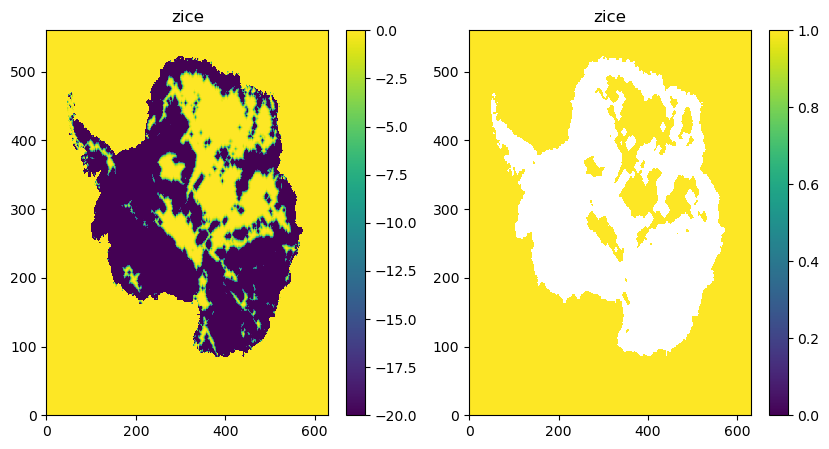

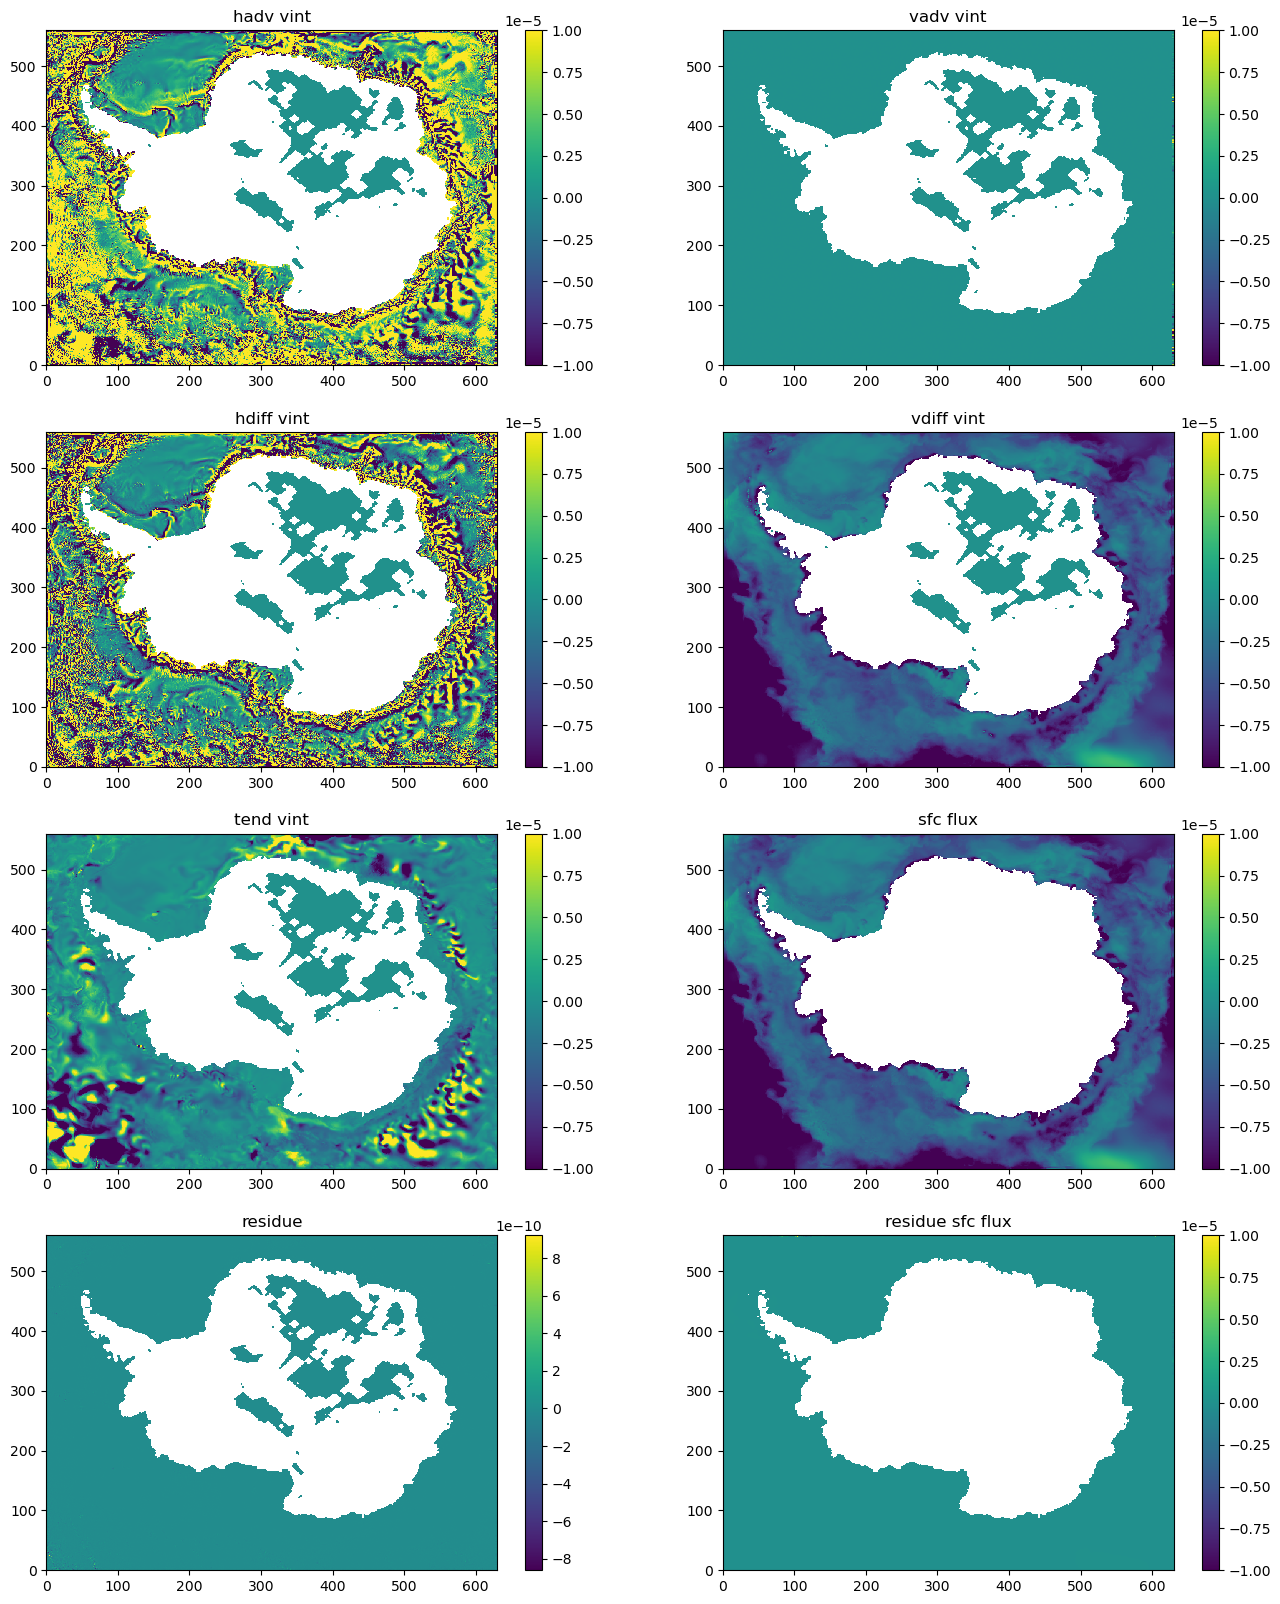

In [11]:
print(temp_hdiff_full_vint.shape)

fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(423)
plt.title('hdiff vint')
cy=plt.pcolor(np.nanmean(temp_hdiff_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax2 = fig.add_subplot(424)
plt.title('vdiff vint')
cy=plt.pcolor(np.nanmean(temp_vdiff_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax3 = fig.add_subplot(421)
plt.title('hadv vint')
cy=plt.pcolor(np.nanmean(temp_hadv_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax4 = fig.add_subplot(422)
plt.title('vadv vint')
cy=plt.pcolor(np.nanmean(temp_vadv_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax5 = fig.add_subplot(425)
plt.title('tend vint')
cy=plt.pcolor(np.nanmean(temp_rate_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax6 = fig.add_subplot(427)
rhs = temp_hdiff_full_vint+temp_vdiff_full_vint+temp_hadv_full_vint+temp_vadv_full_vint
plt.title('residue')
cy=plt.pcolor((np.nanmean(temp_rate_full_vint,axis=0)-np.nanmean(rhs,axis=0))*mask_zice)
plt.colorbar(cy)
ax7 = fig.add_subplot(426)
plt.title('sfc flux')
cy=plt.pcolor(np.nanmean(np.divide(shflux,1025*3985),axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax8 = fig.add_subplot(428)
sfc_res = np.nanmean(np.divide(shflux,1025*3985),axis=0) - np.nanmean(temp_vdiff_full_vint,axis=0)
plt.title('residue sfc flux')
cy=plt.pcolor(sfc_res*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)

fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'
name_fig="waom10extend_shflim_S_0.25Q_heat_budget_annual_full_vint_noice.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


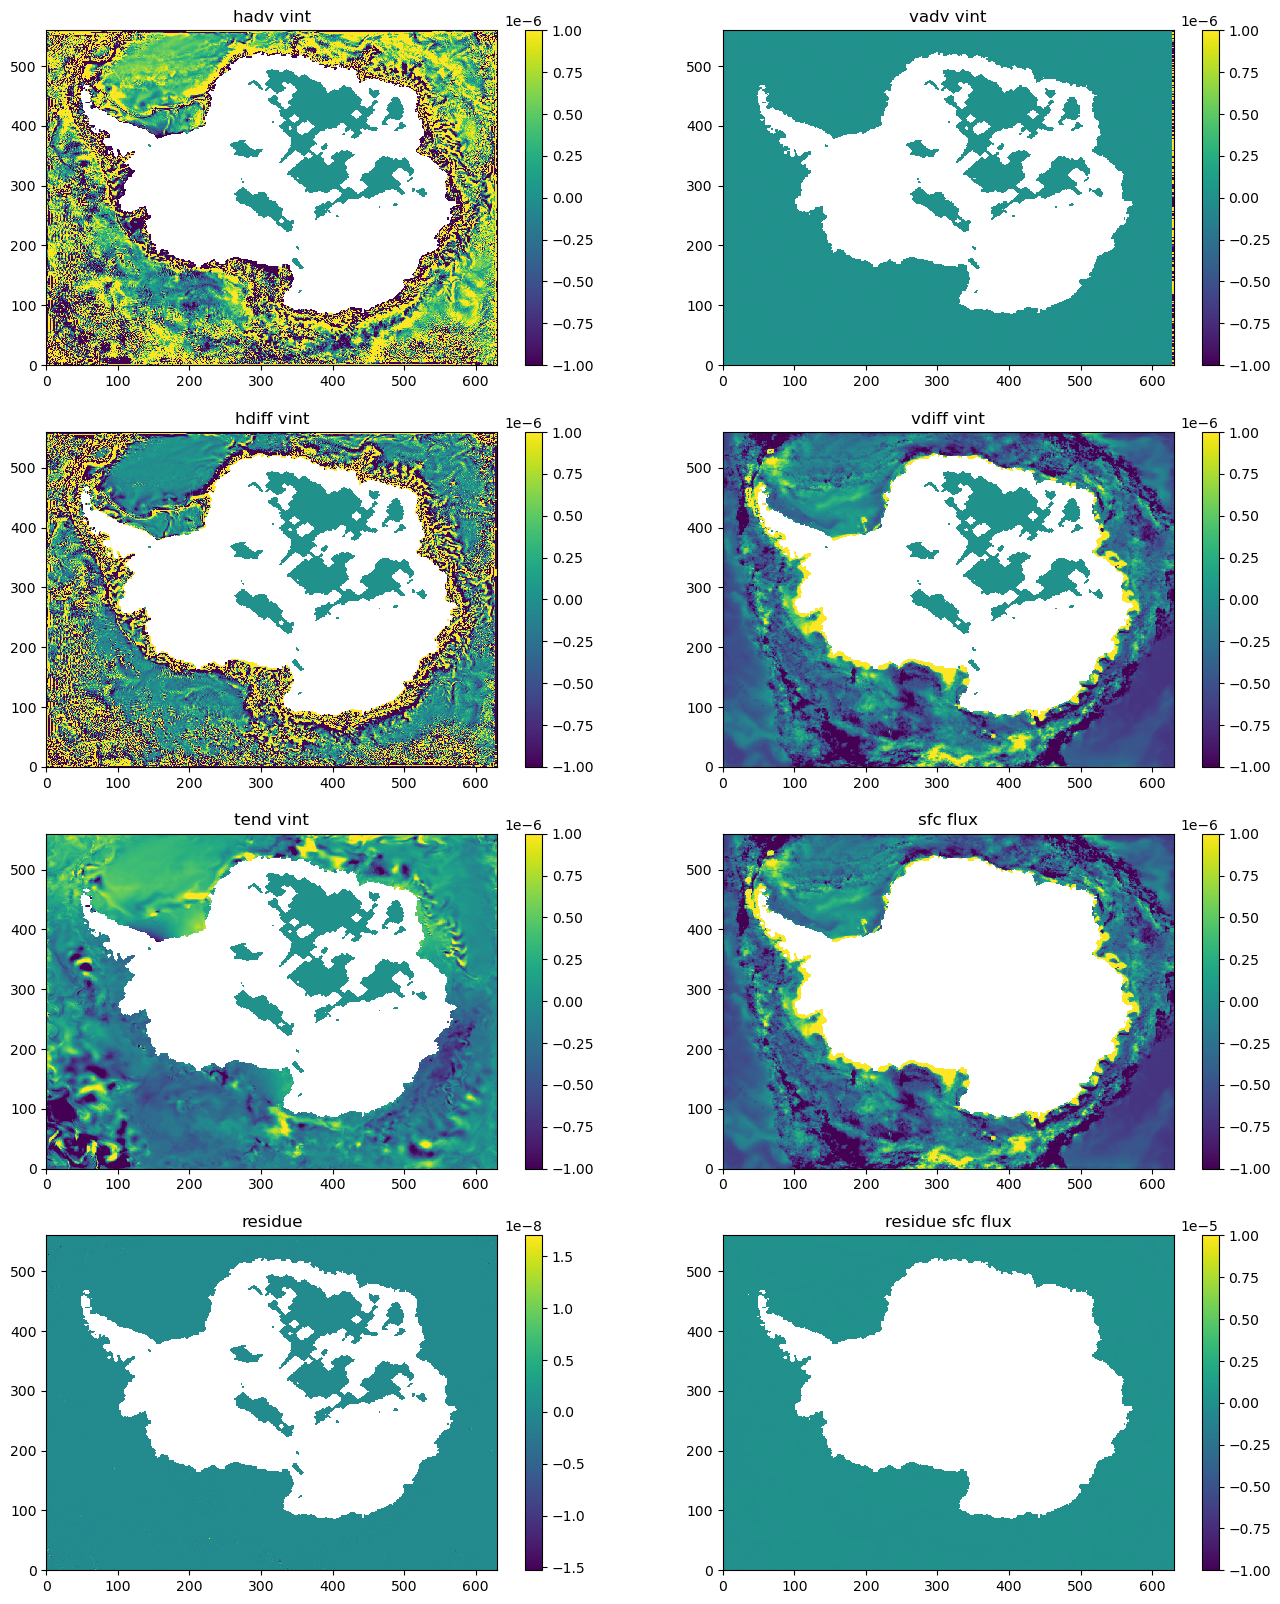

In [12]:
fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(423)
plt.title('hdiff vint')
cy=plt.pcolor(np.nanmean(salt_hdiff_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax2 = fig.add_subplot(424)
plt.title('vdiff vint')
cy=plt.pcolor(np.nanmean(salt_vdiff_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax3 = fig.add_subplot(421)
plt.title('hadv vint')
cy=plt.pcolor(np.nanmean(salt_hadv_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax4 = fig.add_subplot(422)
plt.title('vadv vint')
cy=plt.pcolor(np.nanmean(salt_vadv_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax5 = fig.add_subplot(425)
plt.title('tend vint')
cy=plt.pcolor(np.nanmean(salt_rate_full_vint,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax6 = fig.add_subplot(427)
rhs = salt_hdiff_full_vint+salt_vdiff_full_vint+salt_hadv_full_vint+salt_vadv_full_vint
plt.title('residue')
cy=plt.pcolor((np.nanmean(salt_rate_full_vint,axis=0)-np.nanmean(rhs,axis=0))*mask_zice)
plt.colorbar(cy)
ax7 = fig.add_subplot(426)
plt.title('sfc flux')
cy=plt.pcolor(np.nanmean(ssflux,axis=0)*mask_zice)
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax8 = fig.add_subplot(428)
sfc_res = np.nanmean(ssflux,axis=0) - np.nanmean(salt_vdiff_full_vint,axis=0)
plt.title('residue sfc flux')
cy=plt.pcolor(sfc_res*mask_zice)
plt.colorbar(cy)
plt.clim(-.00001,.00001)


name_fig="waom10extend_shflim_S_0.25Q_salt_budget_annual_full_vint_noice.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()


(12, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


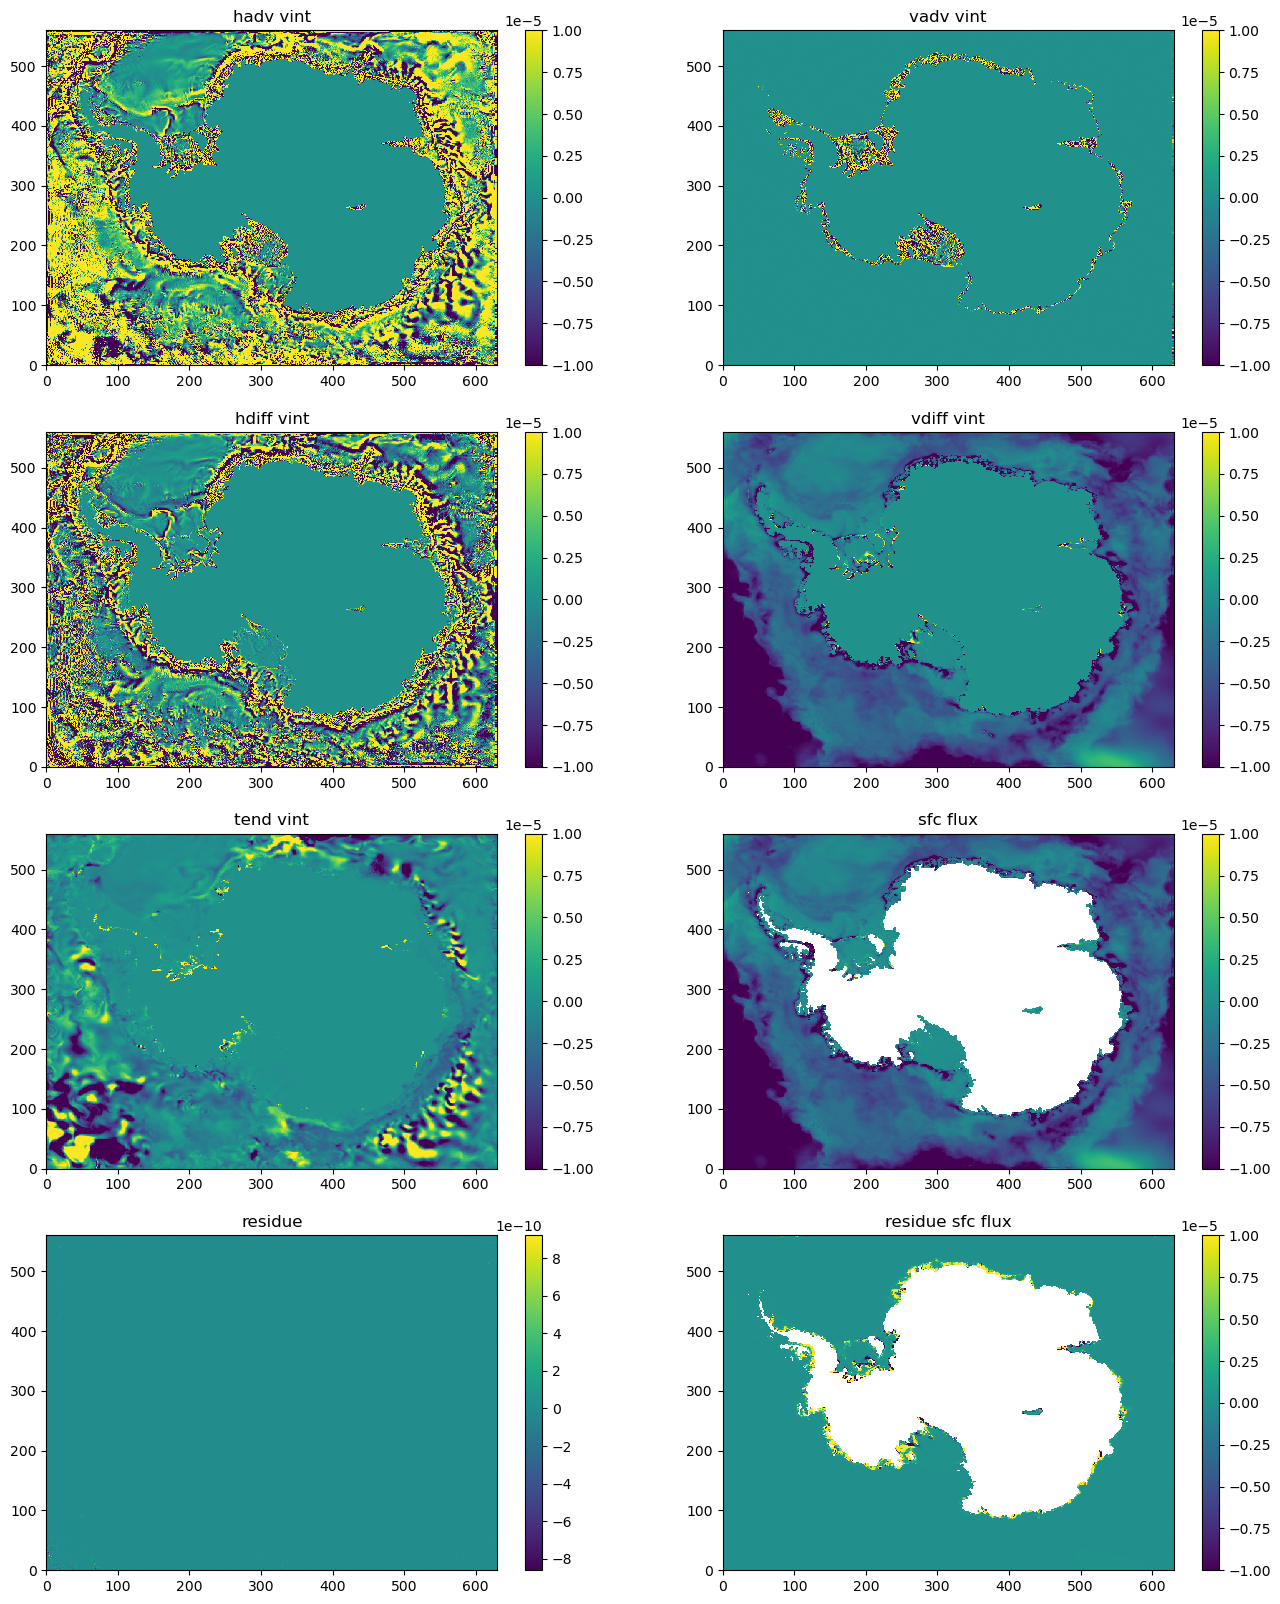

In [13]:
print(temp_hdiff_full_vint.shape)

fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(423)
plt.title('hdiff vint')
cy=plt.pcolor(np.nanmean(temp_hdiff_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax2 = fig.add_subplot(424)
plt.title('vdiff vint')
cy=plt.pcolor(np.nanmean(temp_vdiff_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax3 = fig.add_subplot(421)
plt.title('hadv vint')
cy=plt.pcolor(np.nanmean(temp_hadv_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax4 = fig.add_subplot(422)
plt.title('vadv vint')
cy=plt.pcolor(np.nanmean(temp_vadv_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax5 = fig.add_subplot(425)
plt.title('tend vint')
cy=plt.pcolor(np.nanmean(temp_rate_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax6 = fig.add_subplot(427)
rhs = temp_hdiff_full_vint+temp_vdiff_full_vint+temp_hadv_full_vint+temp_vadv_full_vint
plt.title('residue')
cy=plt.pcolor((np.nanmean(temp_rate_full_vint,axis=0)-np.nanmean(rhs,axis=0)))
plt.colorbar(cy)
ax7 = fig.add_subplot(426)
plt.title('sfc flux')
cy=plt.pcolor(np.nanmean(np.divide(shflux,1025*3985),axis=0))
plt.colorbar(cy)
plt.clim(-.00001,.00001)
ax8 = fig.add_subplot(428)
sfc_res = np.nanmean(np.divide(shflux,1025*3985),axis=0) - np.nanmean(temp_vdiff_full_vint,axis=0)
plt.title('residue sfc flux')
cy=plt.pcolor(sfc_res)
plt.colorbar(cy)
plt.clim(-.00001,.00001)

name_fig="waom10extend_shflim_S_0.25Q_heat_budget_annual_full_vint.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


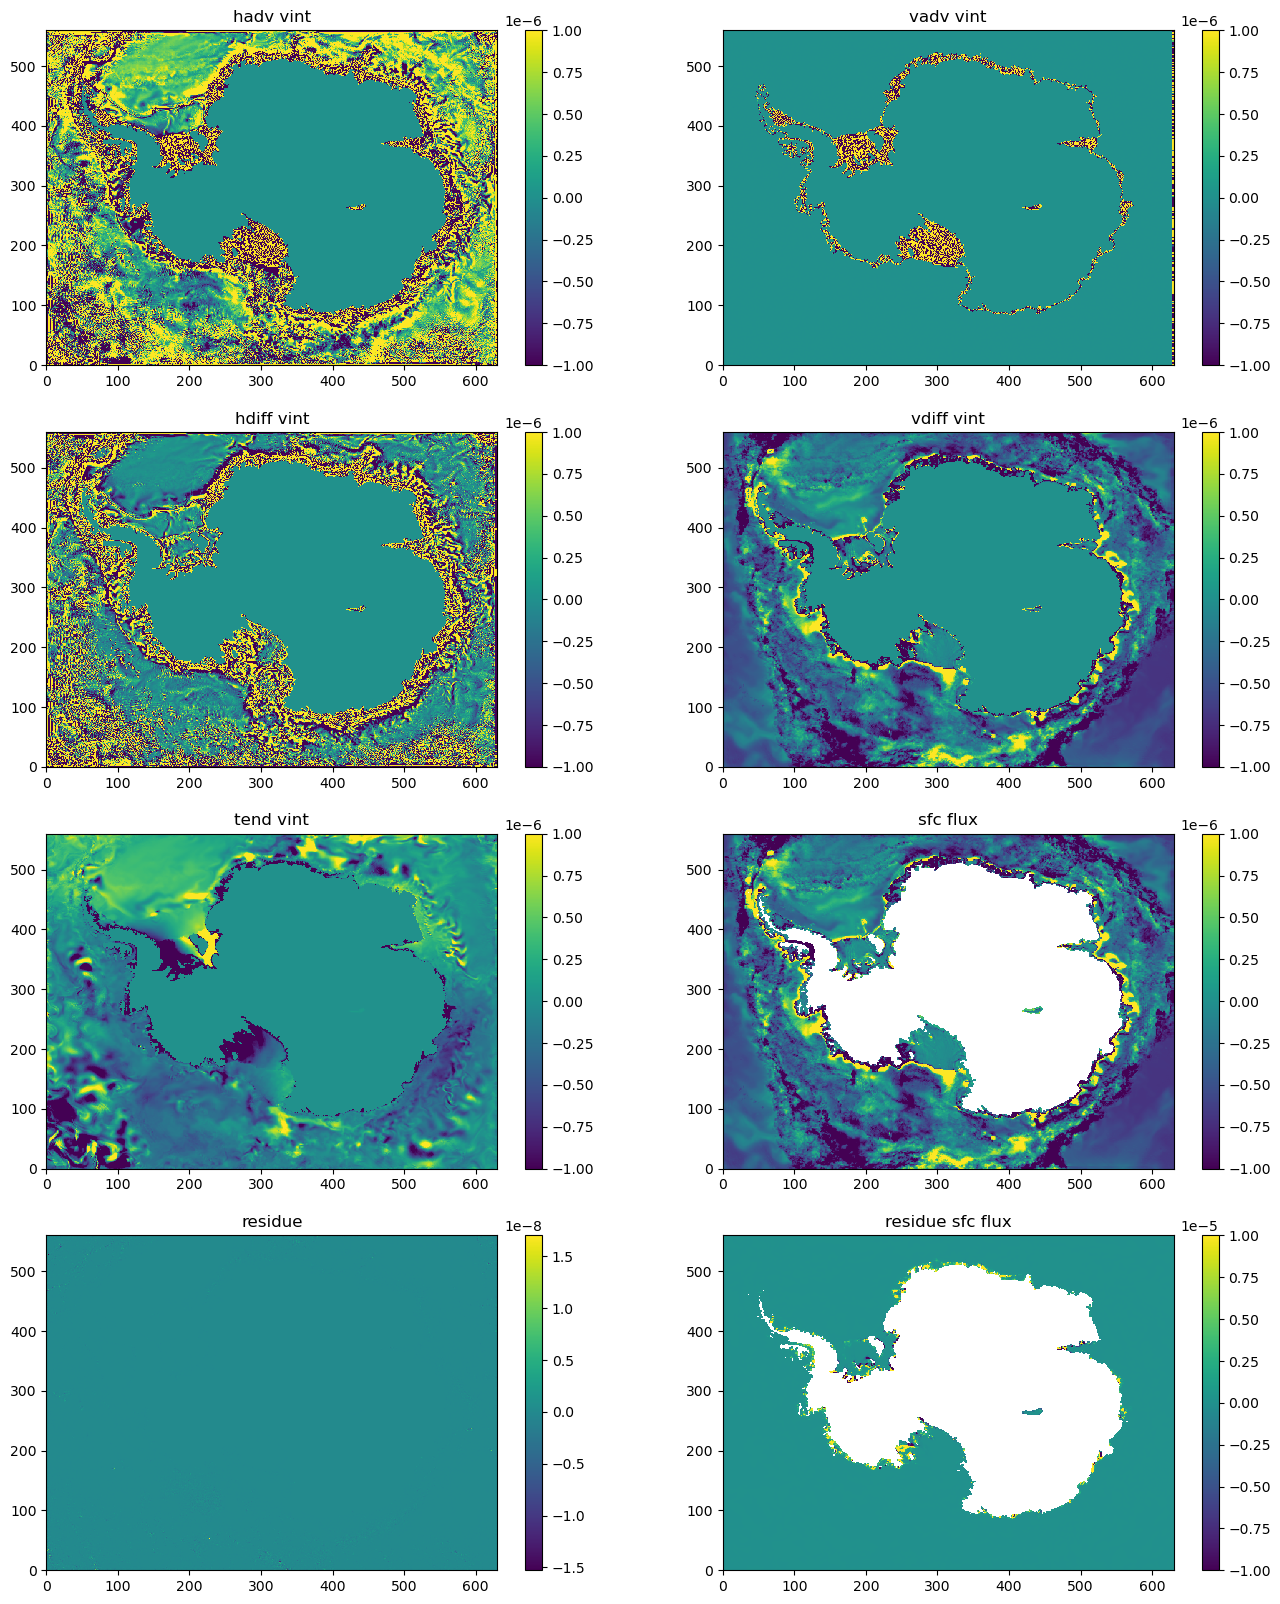

In [14]:
fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(423)
plt.title('hdiff vint')
cy=plt.pcolor(np.nanmean(salt_hdiff_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax2 = fig.add_subplot(424)
plt.title('vdiff vint')
cy=plt.pcolor(np.nanmean(salt_vdiff_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax3 = fig.add_subplot(421)
plt.title('hadv vint')
cy=plt.pcolor(np.nanmean(salt_hadv_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax4 = fig.add_subplot(422)
plt.title('vadv vint')
cy=plt.pcolor(np.nanmean(salt_vadv_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax5 = fig.add_subplot(425)
plt.title('tend vint')
cy=plt.pcolor(np.nanmean(salt_rate_full_vint,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax6 = fig.add_subplot(427)
rhs = salt_hdiff_full_vint+salt_vdiff_full_vint+salt_hadv_full_vint+salt_vadv_full_vint
plt.title('residue')
cy=plt.pcolor((np.nanmean(salt_rate_full_vint,axis=0)-np.nanmean(rhs,axis=0)))
plt.colorbar(cy)
ax7 = fig.add_subplot(426)
plt.title('sfc flux')
cy=plt.pcolor(np.nanmean(ssflux,axis=0))
plt.colorbar(cy)
plt.clim(-.000001,.000001)
ax8 = fig.add_subplot(428)
sfc_res = np.nanmean(ssflux,axis=0) - np.nanmean(salt_vdiff_full_vint,axis=0)
plt.title('residue sfc flux')
cy=plt.pcolor(sfc_res)
plt.colorbar(cy)
plt.clim(-.00001,.00001)

name_fig="waom10extend_shflim_S_0.25Q_salt_budget_annual_full_vint.png"
plt.savefig(fig_path + name_fig, dpi=300)

plt.show()

In [15]:
# export netCDF file containing:
# - MLD (Hsbl)
# - temp and salt averaged over MLD [temp_MLD, salt_MLD] 
# - temp/salt diffusion components (xz and yz, across MLD)

fn = '/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_vars_for_WMT.nc'
dx = Dataset(fn, 'w', format='NETCDF4')

times = dx.createDimension('times', 12)
xi_rho = dx.createDimension('xi_rho', 630,)
eta_rho = dx.createDimension('eta_rho', 560)

In [16]:
ocean_times = dx.createVariable('times', 'f4', ('times',))
ocean_times.units = 'seconds of the year'
xi = dx.createVariable('xi_rho', 'f4', ('xi_rho',))
eta = dx.createVariable('eta_rho', 'f4', ('eta_rho',))
#sfc_mld = dx.createVariable('sfc_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
#sfc_mld.units = 'Surface boundary layer depth (meters)'
#temp_avg_mld = dx.createVariable('temp_avg_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
#temp_avg_mld.units = 'Averaged temperature in the MLD (deg Celsius)'
#salt_avg_mld = dx.createVariable('salt_avg_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
#salt_avg_mld.units = 'Averaged salinity in the MLD (pss)'

# vertically integrated terms
# diffusion terms
temp_vdia_diff_full_vint = dx.createVariable('temp_vdia_diff_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_vdia_diff_full_vint = dx.createVariable('salt_vdia_diff_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_vdia_diff_full_vint.units = 'vertical MLD component  of temp_diff depth-integrated throughout the MLD (degC s-1)'
salt_vdia_diff_full_vint.units = 'vertical MLD component  of salt_diff depth-integrated throughout the MLD (s-1)'
temp_hdia_diff_full_vint = dx.createVariable('temp_hdia_diff_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_hdia_diff_full_vint = dx.createVariable('salt_hdia_diff_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_hdia_diff_full_vint.units = 'horizontal MLD component of temp_diff depth-integrated throughout the MLD (degC s-1)'
salt_hdia_diff_full_vint.units = 'horizontal MLD component of salt_diff depth-integrated throughout the MLD (s-1)'
# advective terms
temp_vdia_adv_full_vint = dx.createVariable('temp_vdia_adv_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_vdia_adv_full_vint = dx.createVariable('salt_vdia_adv_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_vdia_adv_full_vint.units = 'vertical MLD component  of temp_adv to the base of the MLD (degC s-1)'
salt_vdia_adv_full_vint.units = 'vertical MLD component  of salt_adv to the base of the MLD (s-1)'
temp_hdia_adv_full_vint = dx.createVariable('temp_hdia_adv_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_hdia_adv_full_vint = dx.createVariable('salt_hdia_adv_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_hdia_adv_full_vint.units = 'horizontal MLD component of temp_adv to the base of the MLD (degC s-1)'
salt_hdia_adv_full_vint.units = 'horizontal MLD component of salt_adv to the base of the MLD (s-1)'
# tendency terms
temp_tend_full_vint = dx.createVariable('temp_tend_avg_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_tend_full_vint = dx.createVariable('salt_tend_avg_full_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_tend_full_vint.units = 'temp_rate depth-integrated throughout the MLD (degC s-1)'
salt_tend_full_vint.units = 'salt_rate depth-integrated throughout the MLD (s-1)'


In [17]:
ocean_times[:] = np.arange(1314000,31536000,2628000) # monthly 
xi[:] = np.arange(0,630)
eta[:] = np.arange(0,560)

temp_vdia_diff_full_vint[:,:,:] = temp_vdiff_full_vint
salt_vdia_diff_full_vint[:,:,:] = salt_vdiff_full_vint
temp_hdia_diff_full_vint[:,:,:] = temp_hdiff_full_vint
salt_hdia_diff_full_vint[:,:,:] = salt_hdiff_full_vint

temp_vdia_adv_full_vint[:,:,:] = temp_vadv_full_vint
salt_vdia_adv_full_vint[:,:,:] = salt_vadv_full_vint
temp_hdia_adv_full_vint[:,:,:] = temp_hadv_full_vint
salt_hdia_adv_full_vint[:,:,:] = salt_hadv_full_vint

temp_tend_full_vint[:,:,:] = temp_rate_full_vint
salt_tend_full_vint[:,:,:] = salt_rate_full_vint

dx.close()